<span style='font-family:Lato'><span style='font-size:125%'>
    Today we'll be taking a dive into the world of Natural Language Processing (NLP) with a baisc simple Text Classification model.<br>
    We'll be dealing with <a href =''>SMS Spam dataset</a> from Kaggle. Before anything else let us understand what NLP really is .<br>
    <b>NLP :</b> It is a branch of AI which deals with the human language. It enables a machine to read, understanf and derive meaning from human language. Since, computers can understand language just like we do, they must be pre-processed in order to be understood by the computer.<br>
    Out of the many things we do in NLP , I'll be covering only two simple one's : Text Polarity and Count Vecotorization.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#--Importing the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(context = 'paper', style = 'whitegrid', font = 'Georgia', font_scale = 1.2)

In [3]:
!unzip '/content/drive/MyDrive/Spam_Ham  (nlp)/archive.zip' -d '/content/drive/MyDrive/Spam_Ham  (nlp)/Sham_ham_nlp'

Archive:  /content/drive/MyDrive/Spam_Ham  (nlp)/archive.zip
  inflating: /content/drive/MyDrive/Spam_Ham  (nlp)/Sham_ham_nlp/SMS spam  


In [6]:
#--Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Spam_Ham  (nlp)/Sham_ham_nlp/SMS spam', sep = '\t',
                 header = None, names=['Labels','SMS'])
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<span style='font-family:Lato'><span style='font-size:125%'>
    EXPLORATORY DATA ANALYSIS
    </span>

In [7]:
#--Any random 5 values from the dataset
df['SMS'].sample(5)

2345                                       Okie...
1348                     She doesnt need any test.
2759         What time. I‘m out until prob 3 or so
3146    I.ll get there tomorrow and send it to you
2666                R u meeting da ge at nite tmr?
Name: SMS, dtype: object

In [8]:
#--Checking the value counts of Label's column
df['Labels'].value_counts()

ham     4825
spam     747
Name: Labels, dtype: int64

In [9]:
#--Checking for any null values
df.isnull().sum()

Labels    0
SMS       0
dtype: int64

In [10]:
#--Label Encoding
df['Labels'] = [1 if i == 'ham' else 0 for i in df['Labels']]

<span style='font-family:Lato'><span style='font-size:125%'>
    DATA VISULAIZATION
    </span>

In [11]:
df.head()

,Labels,SMS
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


<span style='font-family:Lato'><span style='font-size:125%'>
    <b>Text Polarity :</b> In simpler terms it tells us if a sentence is positve, negative or neutral.The UDF below uses polarity score to classify a text as positive or negative.
    </span>

In [12]:
#--A UDF to check for polarity of the text
from textblob import TextBlob
def sent_sentiment(sentence):
    blob = TextBlob(sentence)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0 :
        return 'Negative'
    else:
        return 'Neutral'

In [13]:
#--Applying the UDF to our dataset
df['SMS_sentiment'] = df['SMS'].apply(sent_sentiment)

In [14]:
df.head()

,Labels,SMS,SMS_sentiment
0,1,"Go until jurong point, crazy.. Available only ...",Positive
1,1,Ok lar... Joking wif u oni...,Positive
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Positive
3,1,U dun say so early hor... U c already then say...,Positive
4,1,"Nah I don't think he goes to usf, he lives aro...",Neutral


In [17]:
positive = df[df['SMS_sentiment'] == 'Positive']
positive

,Labels,SMS,SMS_sentiment
0,1,"Go until jurong point, crazy.. Available only ...",Positive
1,1,Ok lar... Joking wif u oni...,Positive
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Positive
3,1,U dun say so early hor... U c already then say...,Positive
5,0,FreeMsg Hey there darling it's been 3 week's n...,Positive
...,...,...,...
5562,1,Ok lor... Sony ericsson salesman... I ask shuh...,Positive
5566,0,REMINDER FROM O2: To get 2.50 pounds free call...,Positive
5567,0,This is the 2nd time we have tried 2 contact u...,Positive
5570,1,The guy did some bitching but I acted like i'd...,Positive


In [21]:
pos_spam = positive[positive['Labels'] == 0].SMS_sentiment
pos_spam

2       Positive
5       Positive
9       Positive
11      Positive
12      Positive
          ...   
5467    Positive
5540    Positive
5547    Positive
5566    Positive
5567    Positive
Name: SMS_sentiment, Length: 431, dtype: object

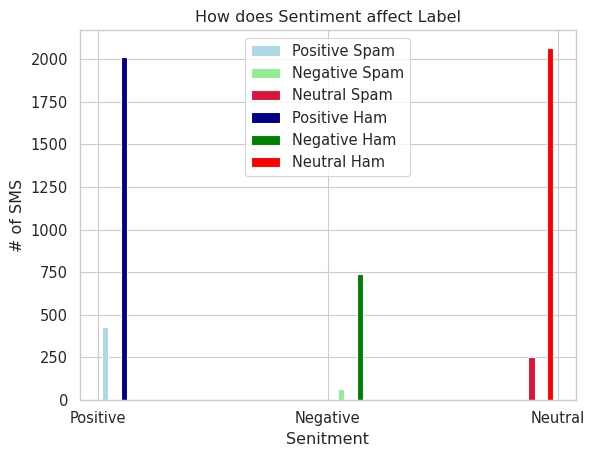

In [22]:
#--How does Sentiment of a sentence reflect in Label column
positive = df[df['SMS_sentiment'] == 'Positive']
negative = df[df['SMS_sentiment'] == 'Negative']
neutral = df[df['SMS_sentiment'] == 'Neutral']

pos_spam = positive[positive['Labels'] == 0].SMS_sentiment
neg_spam = negative[negative['Labels'] == 0].SMS_sentiment
neu_spam = neutral[neutral['Labels'] == 0].SMS_sentiment

pos_ham = positive[positive['Labels'] == 1].SMS_sentiment
neg_ham = negative[negative['Labels'] == 1].SMS_sentiment
neu_ham = neutral[neutral['Labels'] == 1].SMS_sentiment

plt.hist([pos_spam,neg_spam,neu_spam,pos_ham,neg_ham,neu_ham],
         color =['lightblue','lightgreen','crimson','darkblue','green','red'],
         label=['Positive Spam','Negative Spam','Neutral Spam','Positive Ham','Negative Ham','Neutral Ham'])
plt.legend()
plt.title('How does Sentiment affect Label')
plt.xlabel('Senitment')
plt.ylabel('# of SMS')
plt.show()

<span style='font-family:Lato'><span style='font-size:125%'>
    There isn't any direct relation of Spam/Ham to the polarity score of the sentence.Overall there are fewer negative sms.However, we do see that Spma messages are more postive in nature than negative, this is true as Spam are to lure people in, they use fancy words and create a postive environment for a person to belive their scam etc.
    </span>

<span style='font-family:Lato'><span style='font-size:125%'>
    MODEL BUILDING
    </span>

In [23]:
#--Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(df['SMS'],df['Labels'], test_size = 0.30,
                                                random_state = 0)

<span style='font-family:Lato'><span style='font-size:125%'>
    <b>Count Vecotorization : </b> Countvectorizer is a method to convert text to numerical data. This is important since computers cannot understand words, they understand numbers.<br>
    It is not the best choice is some cases although it is the simplest one to use and understand.I've included two hyperparameters in CountVectorization, the first one is the stop_words which help us ignore the words which don't hold any importance in the english language and the second one I've removed the numbers in the text.
    </span>

In [24]:
#--UDF for removing any numbers
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

In [25]:
#--Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = 'english',preprocessor=preprocess_text)
X_train = vectorizer.fit_transform(X_train)
x_test = vectorizer.transform(x_test)

In [26]:
#--CV matrix
count_array = X_train.toarray()
vect = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
vect.head()

,____,aah,aaniye,aathi,ab,abel,aberdeen,abi,ability,abiola,...,zeros,zf,zhong,zindgi,zoe,zouk,zs,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#--Model Building
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train,Y_train)

In [28]:
#--Getting predictions
y_pred = model.predict(x_test)

In [29]:
#--Evalution Metrics
from sklearn.metrics import classification_report , confusion_matrix

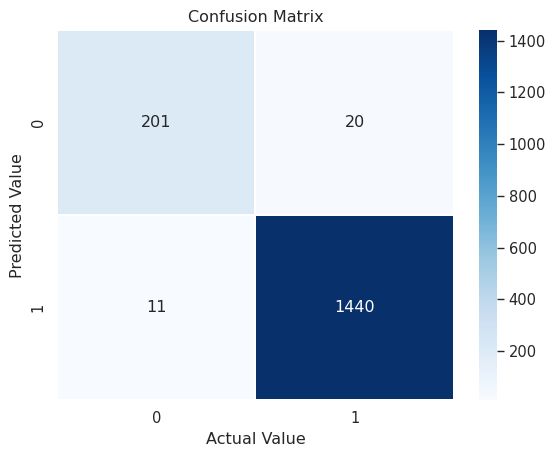

In [30]:
#--Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred),fmt = 'd', cmap = 'Blues', linewidths = .1, annot = True)
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [31]:
#--Classification Report
print(f"Classification report : \n {classification_report(y_test,y_pred)}")

Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       221
           1       0.99      0.99      0.99      1451

    accuracy                           0.98      1672
   macro avg       0.97      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



<span style='font-family:Lato'><span style='font-size:125%'>
    END-REMARK
    <ul><span style='font-family:Lato'><span style='font-size:125%'>
        <li> We started off with SMS Spam dataset </li>
        <li> We did some EDA and saw how sentiment of a sentence might reflect in Label.</li>
        <li> We converted words into numeric values using Count Vecotorizer.</li>
        <li> Build a model using Naive bayes </li>
        <li> Our model is satisfactory given the precision, recall and f1 score.</li>
        </span>
<span style='font-family:Lato'><span style='font-size:125%'>
  If you find this notebook any helpful it'd mean a lot if you'd upvote is. Your upvote matters.
        <i>Happy Coding :)</i>